In [8]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import itertools
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
import scipy
import scipy.sparse.linalg
import scipy.linalg
import scipy.sparse
from oneD_tool import *
from quimb.tensor import *

L = 20
mean_ = [0.0, 0.02, 0.05, 0.1, 0.2]
bond_dim_ = [10, 20, 50]
dtype = "float64"   #dtype of the mps, float64 or complex128
for mean in mean_:
    for bond_dim in bond_dim_:
        mps = MPS_rand_state(L = L, dtype=dtype, bond_dim=bond_dim, seed=2)
        for tensor in mps.tensors:
            data = tensor.data
            data += mean
        prob = mps.contract(all, optimize='auto-hq')
        prob_exact = np.real(prob.data.conj()*prob.data)
        norm = prob_exact.sum()
        prob_exact = prob_exact/norm
        mean_corr, var_corr = spin_correlation_all(prob_exact, L)
        cmi = cmi_(prob_exact, L)
        cmi_all = cmi_traceout(prob_exact, L)

        np.save("result/random_mps/cmi_random_mps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", cmi)
        np.save("result/random_mps/mean_corr_random_mps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", mean_corr)
        np.save("result/random_mps/var_corr_random_mps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", var_corr)
        np.save("result/random_mps/cmi_traceout_random_mps_L"+str(L)+"_mean_"+str(mean)+"_bond_dim_"+str(bond_dim)+"_dtype="+str(dtype)+".npy", cmi_all)


In [14]:
L = 20
mean_ = [0.0, 0.02, 0.05, 0.1, 0.2]
bond_dim_ = [10, 20, 50]
cmi = {}
mean_corr = {}
var_corr = {}
cmi_traceout = {}

# Looping through the values and loading each file
for m in mean_:
    for b in bond_dim_:
        filename = f"result/random_mps/cmi_random_mps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        cmi[m, b] = np.load(filename)
        filename = f"result/random_mps/mean_corr_random_mps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        mean_corr[m, b] = np.load(filename)
        mean_corr[m, b] = np.abs(mean_corr[m, b])
        filename = f"result/random_mps/var_corr_random_mps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        var_corr[m, b] = np.load(filename)
        filename = f"result/random_mps/cmi_traceout_random_mps_L{L}_mean_{m}_bond_dim_{b}_dtype={dtype}.npy"
        cmi_traceout[m, b] = np.load(filename, allow_pickle=True)


In [15]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[[] for j in  range (len(bond_dim_))]for i in range (len(mean_)) ]
err_cmi_length_traceout = [[[] for j in  range (len(bond_dim_)) ]for i in range (len(mean_))]

for i in mean_:
    for b in bond_dim_:
        df = len(cmi[i, b])-2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i ,b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i, b])) - mean_x)**2))
        cmi_length.append(cmi_len)
        err_cmi_length.append(err)

        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i, b])), -np.log(mean_corr[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i, b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i, b])) - mean_x)**2))
        corre_length.append(corr_len)
        err_corre_length.append(err)

        for j in range(len(cmi_traceout[i, b])):
            df = len(cmi_traceout[i, b][j])-2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i, b][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i, b][j])) - mean_x)**2))
            cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(cmi_len)
            err_cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(err)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\932940918.py:25: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\932940918.py:25: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\932940918.py:11: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\932940918.py:11: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


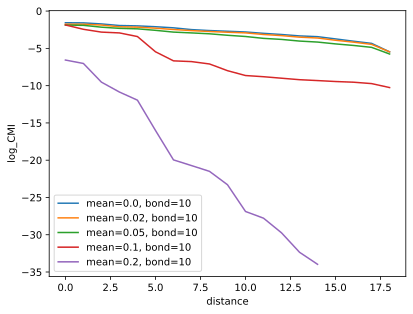

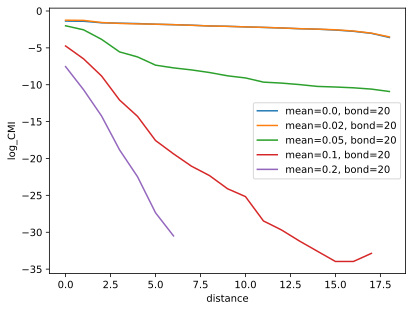

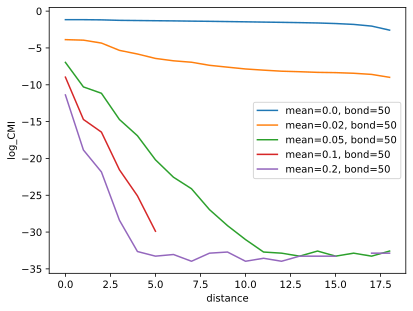

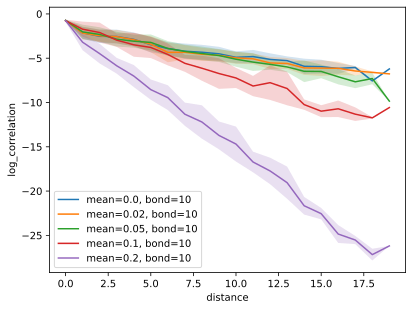

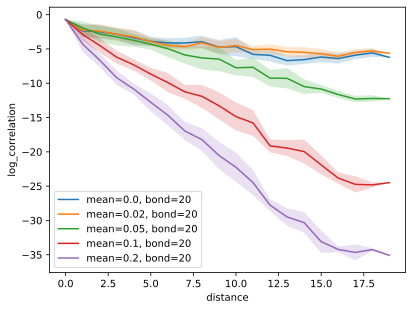

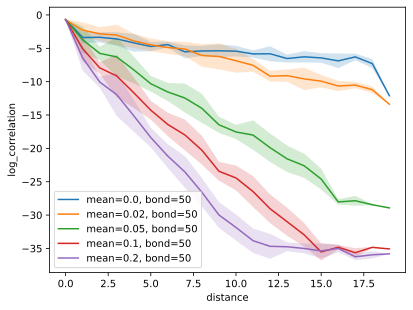

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:25: RuntimeWarning: divide by zero encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\1539037828.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:

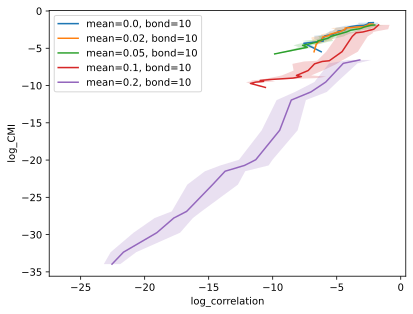

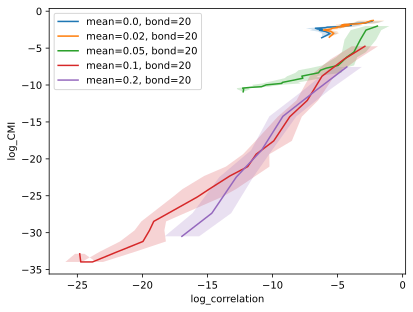

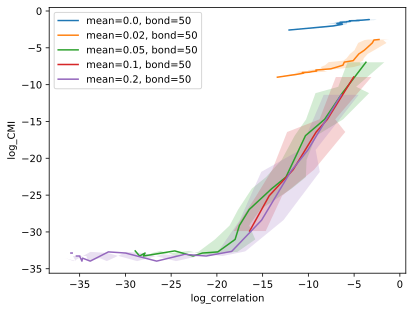

<Figure size 640x480 with 0 Axes>

In [16]:
for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_mps/cmi_random_mps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_mps/correlation_random_mps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_mps/correlation_cmi_random_mps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



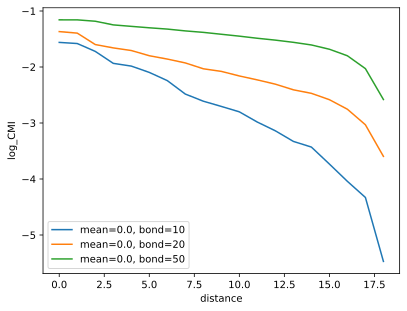

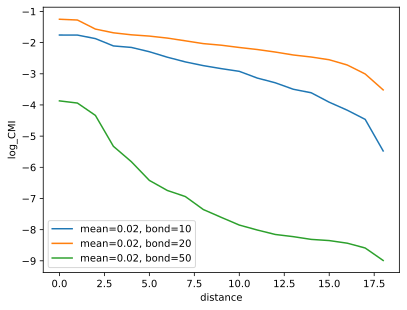

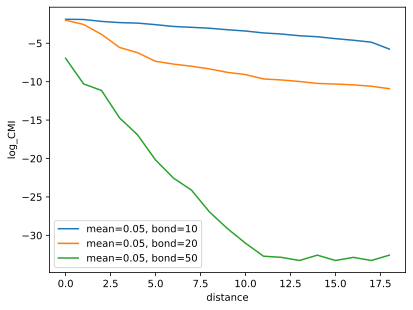

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


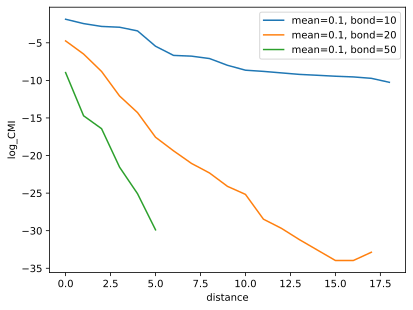

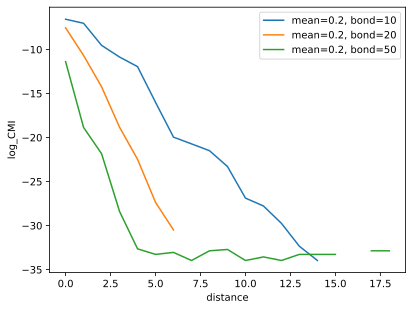

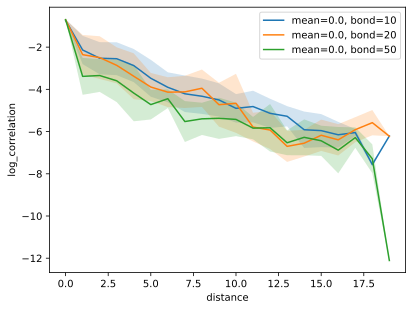

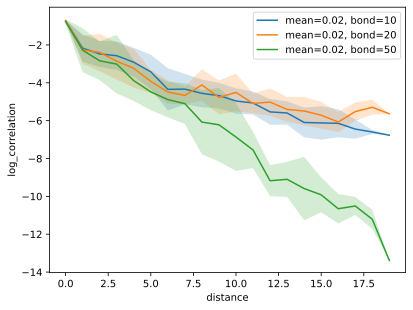

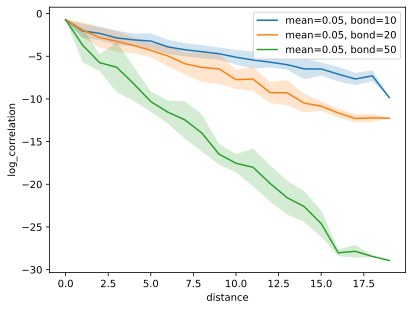

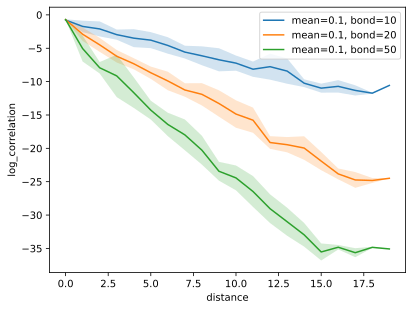

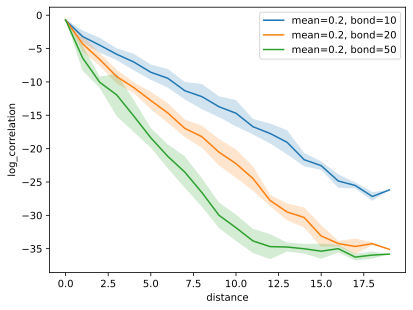

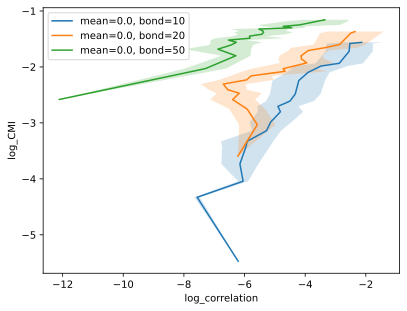

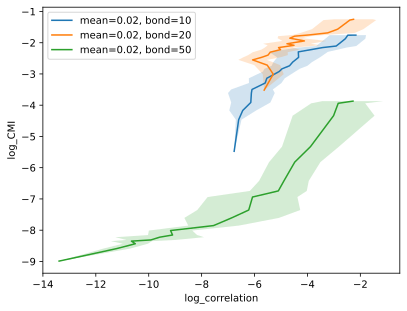

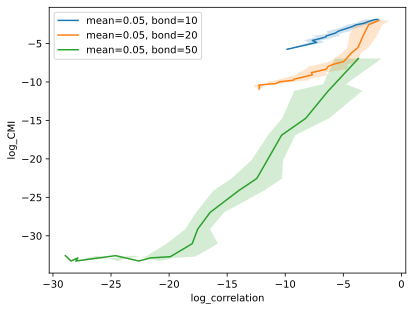

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:25: RuntimeWarning: divide by zero encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\2045902470.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:

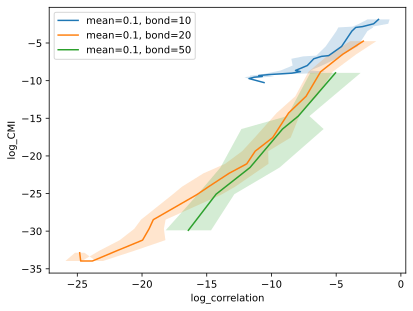

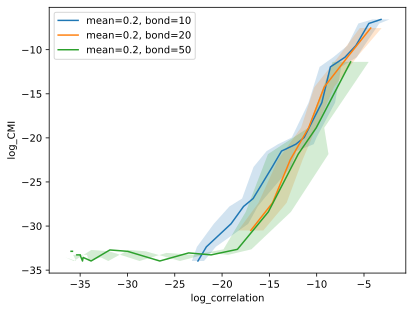

<Figure size 640x480 with 0 Axes>

In [17]:
for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_mps/cmi_random_mps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_mps/correlation_random_mps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_mps/correlation_cmi_random_mps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



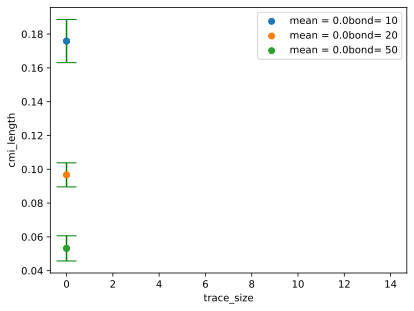

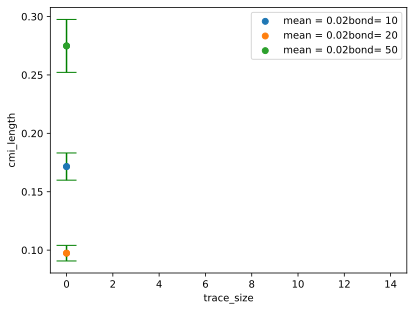

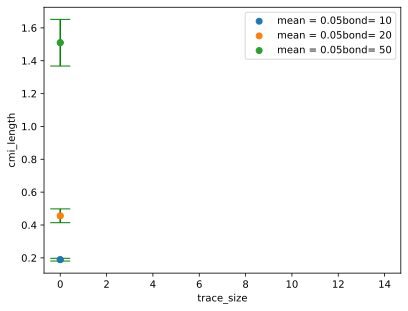

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


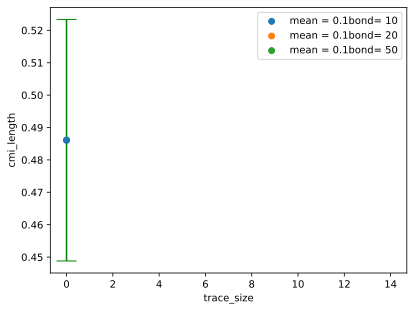

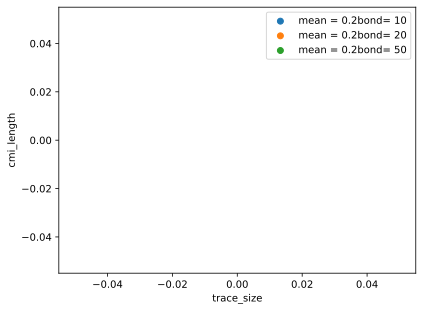

<Figure size 640x480 with 0 Axes>

In [18]:
for i in range(len(mean_)):
    for j in range(len(bond_dim_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label= "mean = "+str(mean_[i])+"bond= "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_mps/traceout/cmi_length_traceout_random_mps_L"+str(L)+"bond_dim="+str(j)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

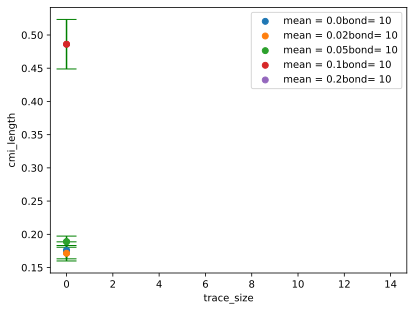

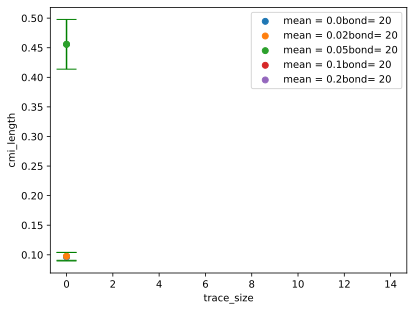

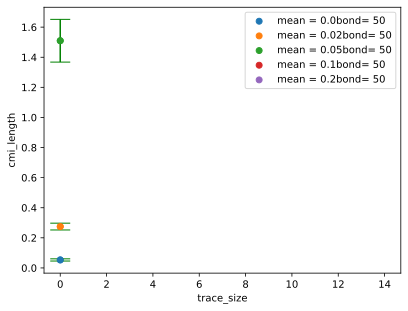

<Figure size 640x480 with 0 Axes>

In [19]:
for j in range(len(bond_dim_)):
    for i in range(len(mean_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label= "mean = "+str(mean_[i])+"bond= "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_mps/traceout/cmi_length_traceout_random_mps_L"+str(L)+"_bond_dim="+str(j)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()